In [1]:
# libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("-------------------------------Cargando dataset--------------------------------")
df = pd.read_csv("/mnt/c/Users/chris/Ironhack/lab-pandas-II/Death Cause Reason by Country.csv")

-------------------------------Cargando dataset--------------------------------


In [3]:
# muestra dataframe
df.head(3)

,Country Name,Covid-19 Deaths,Cardiovascular diseases,Respiratory diseases,Kidney diseases,Neonatal disorders,Meningitis,Malaria,Interpersonal violence,HIV/AIDS,Tuberculosis,Maternal disorders,Lower respiratory infections,Alcohol use disorders,Diarrheal diseases,Poisoning,Nutritional deficiencies,Alzheimer's disease,Parkinson's disease,Acute hepatitis,Digestive diseases,Cirrhosis and other chronic liver diseases,Protein-energy malnutrition,Neoplasms,"Fire, heat",Drowning,Drug use disorders,Road injuries,Environmental heat and cold exposure,Self-harm,Conflict and terrorism,Diabetes,Unnamed: 32
0,Afghanistan,2201.00,61995,7082,5637,23701,1563,530,5015,318,3627,4038,18697,147,4320,525,1244,1775,560,1940,6929,3797,1210,21247,485,1687,406,8254,59,1613,24295,4817,NaN
1,Albania,1181.00,12904,815,329,161,13,0,57,2,11,3,457,18,7,11,5,917,248,1,527,333,3,4705,18,36,29,243,4,152,0,175,NaN
2,Algeria,2762.00,97931,7528,8201,8756,292,0,459,264,445,638,5786,111,527,351,114,5209,1283,259,6398,4045,92,23816,782,526,526,11051,40,1515,13,5328,NaN


In [4]:
print("Filas del dataset:", df.shape[0])
print("Columnas del dataset:", df.shape[1])

Filas del dataset: 191
Columnas del dataset: 33


In [5]:
df.dtypes

Country Name                                    object
Covid-19 Deaths                                float64
Cardiovascular diseases                          int64
Respiratory diseases                             int64
Kidney diseases                                  int64
Neonatal disorders                               int64
Meningitis                                       int64
Malaria                                          int64
Interpersonal violence                           int64
HIV/AIDS                                         int64
Tuberculosis                                     int64
Maternal disorders                               int64
Lower respiratory infections                     int64
Alcohol use disorders                            int64
Diarrheal diseases                               int64
Poisoning                                        int64
Nutritional deficiencies                         int64
 Alzheimer's disease                             int64
Parkinson'

# 1. Data cleaning

In [6]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ","_") #Eliminamos los espacios que hay al principio o final en los nombres de las columnas. Ademas sustituimos los espacios interiores por barras bajas para evitar problemas en un futuro
print(f"Nombres de las columnas: {df.columns.tolist()}")

Nombres de las columnas: ['country_name', 'covid-19_deaths', 'cardiovascular_diseases', 'respiratory_diseases', 'kidney_diseases', 'neonatal_disorders', 'meningitis', 'malaria', 'interpersonal_violence', 'hiv/aids', 'tuberculosis', 'maternal_disorders', 'lower_respiratory_infections', 'alcohol_use_disorders', 'diarrheal_diseases', 'poisoning', 'nutritional_deficiencies', "alzheimer's_disease", "parkinson's_disease", 'acute_hepatitis', 'digestive_diseases', 'cirrhosis_and_other_chronic_liver_diseases', 'protein-energy_malnutrition', 'neoplasms', 'fire,_heat', 'drowning', 'drug_use_disorders', 'road_injuries', 'environmental_heat_and_cold_exposure', 'self-harm', 'conflict_and_terrorism', 'diabetes', 'unnamed:_32']


In [7]:
print("Revisando las columnas con valores nulos")
print(f"Longitug total del dataset: {df.shape[0]}")

null_dataset = df.isnull().sum().reset_index().sort_values( by = 0 , ascending = False)
null_dataset["%_from_total"] = (null_dataset[0] / df.shape[0] ) * 100 # columna nueva: porcentaje nulos
display(null_dataset.head())


Revisando las columnas con valores nulos
Longitug total del dataset: 191


,index,0,%_from_total
32,unnamed:_32,191,100.00
1,covid-19_deaths,3,1.57
31,diabetes,0,0.00
30,conflict_and_terrorism,0,0.00
29,self-harm,0,0.00


In [8]:
df = df.iloc[ : , :-1]
print("Mantenemos todas las columnas a excepción de 'unnamed:_32', que el 100% de los datos que contiene son nulos")
df.sample(1)

Mantenemos todas las columnas a excepción de 'unnamed:_32', que el 100% de los datos que contiene son nulos


,country_name,covid-19_deaths,cardiovascular_diseases,respiratory_diseases,kidney_diseases,neonatal_disorders,meningitis,malaria,interpersonal_violence,hiv/aids,tuberculosis,maternal_disorders,lower_respiratory_infections,alcohol_use_disorders,diarrheal_diseases,poisoning,nutritional_deficiencies,alzheimer's_disease,parkinson's_disease,acute_hepatitis,digestive_diseases,cirrhosis_and_other_chronic_liver_diseases,protein-energy_malnutrition,neoplasms,"fire,_heat",drowning,drug_use_disorders,road_injuries,environmental_heat_and_cold_exposure,self-harm,conflict_and_terrorism,diabetes
183,Uruguay,193.00,10003,2155,989,148,14,0,212,177,56,10,1595,111,165,16,134,1497,349,1,1546,471,104,10084,67,71,15,560,6,666,0,895


In [9]:
display_nan = df[df.isin([np.nan]).any(axis=1)] #display valores nulos
display(display_nan)

df = df[(df['country_name'] != 'Greenland') & (df['country_name'] != 'North Korea') & (df['country_name'] != 'Turkmenistan')]
print("En este analisis no nos interesa paises que tengan datos incompletos, por lo que eliminamos los tres paises que no tienen datos de muertes por Covid19")

,country_name,covid-19_deaths,cardiovascular_diseases,respiratory_diseases,kidney_diseases,neonatal_disorders,meningitis,malaria,interpersonal_violence,hiv/aids,tuberculosis,maternal_disorders,lower_respiratory_infections,alcohol_use_disorders,diarrheal_diseases,poisoning,nutritional_deficiencies,alzheimer's_disease,parkinson's_disease,acute_hepatitis,digestive_diseases,cirrhosis_and_other_chronic_liver_diseases,protein-energy_malnutrition,neoplasms,"fire,_heat",drowning,drug_use_disorders,road_injuries,environmental_heat_and_cold_exposure,self-harm,conflict_and_terrorism,diabetes
66,Greenland,NaN,123,32,7,4,1,0,5,2,3,0,12,9,1,0,1,9,4,0,24,9,1,157,2,3,2,2,2,34,0,6
122,North Korea,NaN,102586,31704,4318,1855,223,2,827,761,3242,182,6998,384,289,445,443,5208,1296,125,9205,5171,364,40841,305,1352,338,8382,109,2954,0,4066
176,Turkmenistan,NaN,18323,442,712,1113,52,0,214,105,437,55,1284,180,75,37,11,582,108,43,2749,2381,6,3636,116,129,66,284,136,440,0,759


En este analisis no nos interesa paises que tengan datos incompletos, por lo que eliminamos los tres paises que no tienen datos de muertes por Covid19


# 2 . Data Analysis

In [10]:
print(f"Paises analizados: {df['country_name'].nunique()}")
print(df['country_name'].unique().tolist())

Paises analizados: 188
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechoslovakia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 

In [11]:
df['total_muertes'] = df.sum(axis= 1) # nueva columna : 'Total de muertes'

In [12]:
total = df['total_muertes'].sum()
print("Total de muertes en el mundo:", total)

sum_muertes = df[['country_name', 'total_muertes']].sort_values(by= 'total_muertes', ascending = False)
sum_muertes['porcentaje_total'] = sum_muertes['total_muertes'] / total * 100
display(sum_muertes)

Total de muertes en el mundo: 56454666.0


,country_name,total_muertes,porcentaje_total
35,China,10446900.00,18.50
75,India,8959900.00,15.87
182,United States,3188807.00,5.65
140,Russia,1834020.00,3.25
76,Indonesia,1734850.00,3.07
24,Brazil,1534309.00,2.72
120,Nigeria,1440794.00,2.55
127,Pakistan,1421927.00,2.52
83,Japan,1373233.00,2.43
63,Germany,965872.00,1.71


In [13]:
muertes_causas = df.sum().reset_index()[1:-1].sort_values(by= 0, ascending= False) #eliminamos primera y última fila
muertes_causas['total'] = muertes_causas[0] / muertes_causas[0].sum() * 100
print("El 50 % de las muertes que hay en el mundo se producen por tumores o enfermedades cardiovasculares")
display(muertes_causas)

El 50 % de las muertes que hay en el mundo se producen por tumores o enfermedades cardiovasculares


,index,0,total
2,cardiovascular_diseases,18614036,32.97
23,neoplasms,10217454,18.10
3,respiratory_diseases,3986924,7.06
20,digestive_diseases,2569936,4.55
12,lower_respiratory_infections,2503626,4.43
1,covid-19_deaths,1966744.00,3.48
5,neonatal_disorders,1861095,3.30
17,alzheimer's_disease,1649394,2.92
31,diabetes,1546223,2.74
14,diarrheal_diseases,1515007,2.68


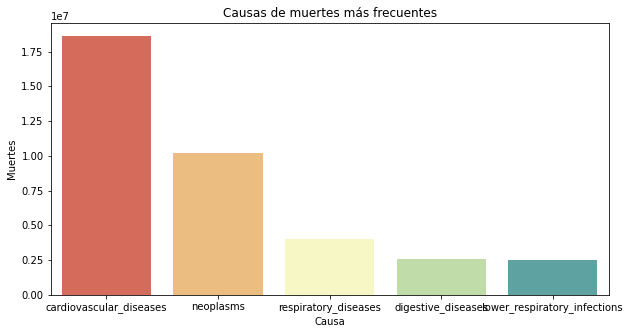

In [14]:
grafico_top5 = muertes_causas.head(5)
plt.figure(figsize=(10,5))
sns.barplot(data = grafico_top5, x = "index", y = 0, palette = "Spectral", ci = None)
plt.title("Causas de muertes más frecuentes")
plt.xlabel("Causa")
plt.ylabel("Muertes")
plt.show()

In [15]:
table_causas =df.apply(['min', 'max', 'mean']).T[1:-1]
print("Como es logico, dada la variabilidad que hay entre paises, todas las causas tienen una gran desviaciación respecto al promedio")
display(table_causas)

Como es logico, dada la variabilidad que hay entre paises, todas las causas tienen una gran desviaciación respecto al promedio


,min,max,mean
covid-19_deaths,1.00,353948.00,10461.40
cardiovascular_diseases,8.00,4584273.00,99010.83
respiratory_diseases,1.00,1168381.00,21207.04
kidney_diseases,1.00,222922.00,7583.45
neonatal_disorders,0.00,438004.00,9899.44
meningitis,0.00,44914.00,1235.55
malaria,0.00,191106.00,3327.29
interpersonal_violence,0.00,65907.00,2186.22
hiv/aids,0.00,143851.00,4443.80
tuberculosis,0.00,422634.00,6148.95


In [27]:
correlacion = df.iloc[ : , :-1].corr()
display(correlacion)


,covid-19_deaths,cardiovascular_diseases,respiratory_diseases,kidney_diseases,neonatal_disorders,meningitis,malaria,interpersonal_violence,hiv/aids,tuberculosis,maternal_disorders,lower_respiratory_infections,alcohol_use_disorders,diarrheal_diseases,poisoning,nutritional_deficiencies,alzheimer's_disease,parkinson's_disease,acute_hepatitis,digestive_diseases,cirrhosis_and_other_chronic_liver_diseases,protein-energy_malnutrition,neoplasms,"fire,_heat",drowning,drug_use_disorders,road_injuries,environmental_heat_and_cold_exposure,self-harm,conflict_and_terrorism,diabetes
covid-19_deaths,1.00,0.33,0.34,0.55,0.25,0.15,-0.01,0.64,0.12,0.27,0.24,0.43,0.56,0.28,0.09,0.35,0.46,0.47,0.27,0.50,0.47,0.32,0.35,0.39,0.26,0.77,0.34,0.34,0.43,-0.03,0.51
cardiovascular_diseases,0.33,1.00,0.93,0.89,0.46,0.36,0.06,0.42,0.25,0.53,0.42,0.73,0.77,0.46,0.90,0.63,0.90,0.97,0.55,0.86,0.83,0.54,0.97,0.79,0.95,0.37,0.95,0.72,0.87,-0.00,0.84
respiratory_diseases,0.34,0.93,1.00,0.94,0.65,0.48,0.10,0.45,0.26,0.76,0.62,0.85,0.70,0.70,0.75,0.69,0.80,0.91,0.77,0.93,0.91,0.54,0.86,0.90,0.98,0.33,0.97,0.75,0.96,0.00,0.91
kidney_diseases,0.55,0.89,0.94,1.00,0.65,0.49,0.12,0.59,0.28,0.72,0.62,0.87,0.73,0.66,0.68,0.75,0.84,0.92,0.73,0.95,0.94,0.62,0.85,0.87,0.91,0.48,0.93,0.70,0.93,0.01,0.96
neonatal_disorders,0.25,0.46,0.65,0.65,1.00,0.88,0.49,0.50,0.40,0.89,0.97,0.85,0.45,0.92,0.27,0.75,0.30,0.44,0.91,0.75,0.76,0.58,0.33,0.82,0.63,0.11,0.60,0.61,0.72,0.10,0.73
meningitis,0.15,0.36,0.48,0.49,0.88,1.00,0.82,0.41,0.52,0.69,0.87,0.77,0.33,0.78,0.30,0.64,0.24,0.34,0.67,0.60,0.60,0.55,0.27,0.65,0.48,0.08,0.47,0.47,0.53,0.10,0.55
malaria,-0.01,0.06,0.10,0.12,0.49,0.82,1.00,0.17,0.48,0.27,0.53,0.43,0.06,0.41,0.14,0.28,0.02,0.05,0.21,0.20,0.20,0.29,0.03,0.25,0.12,-0.00,0.14,0.14,0.13,0.11,0.14
interpersonal_violence,0.64,0.42,0.45,0.59,0.50,0.41,0.17,1.00,0.39,0.47,0.48,0.61,0.63,0.46,0.25,0.55,0.39,0.43,0.45,0.60,0.58,0.50,0.36,0.57,0.47,0.26,0.51,0.49,0.53,0.04,0.64
hiv/aids,0.12,0.25,0.26,0.28,0.40,0.52,0.48,0.39,1.00,0.34,0.41,0.43,0.24,0.35,0.27,0.36,0.19,0.23,0.27,0.32,0.31,0.36,0.21,0.38,0.29,0.07,0.32,0.29,0.30,0.02,0.32
tuberculosis,0.27,0.53,0.76,0.72,0.89,0.69,0.27,0.47,0.34,1.00,0.92,0.87,0.51,0.97,0.24,0.73,0.35,0.50,0.98,0.84,0.85,0.55,0.37,0.90,0.73,0.12,0.69,0.72,0.83,0.03,0.82


------------Correlation_matrix---------------


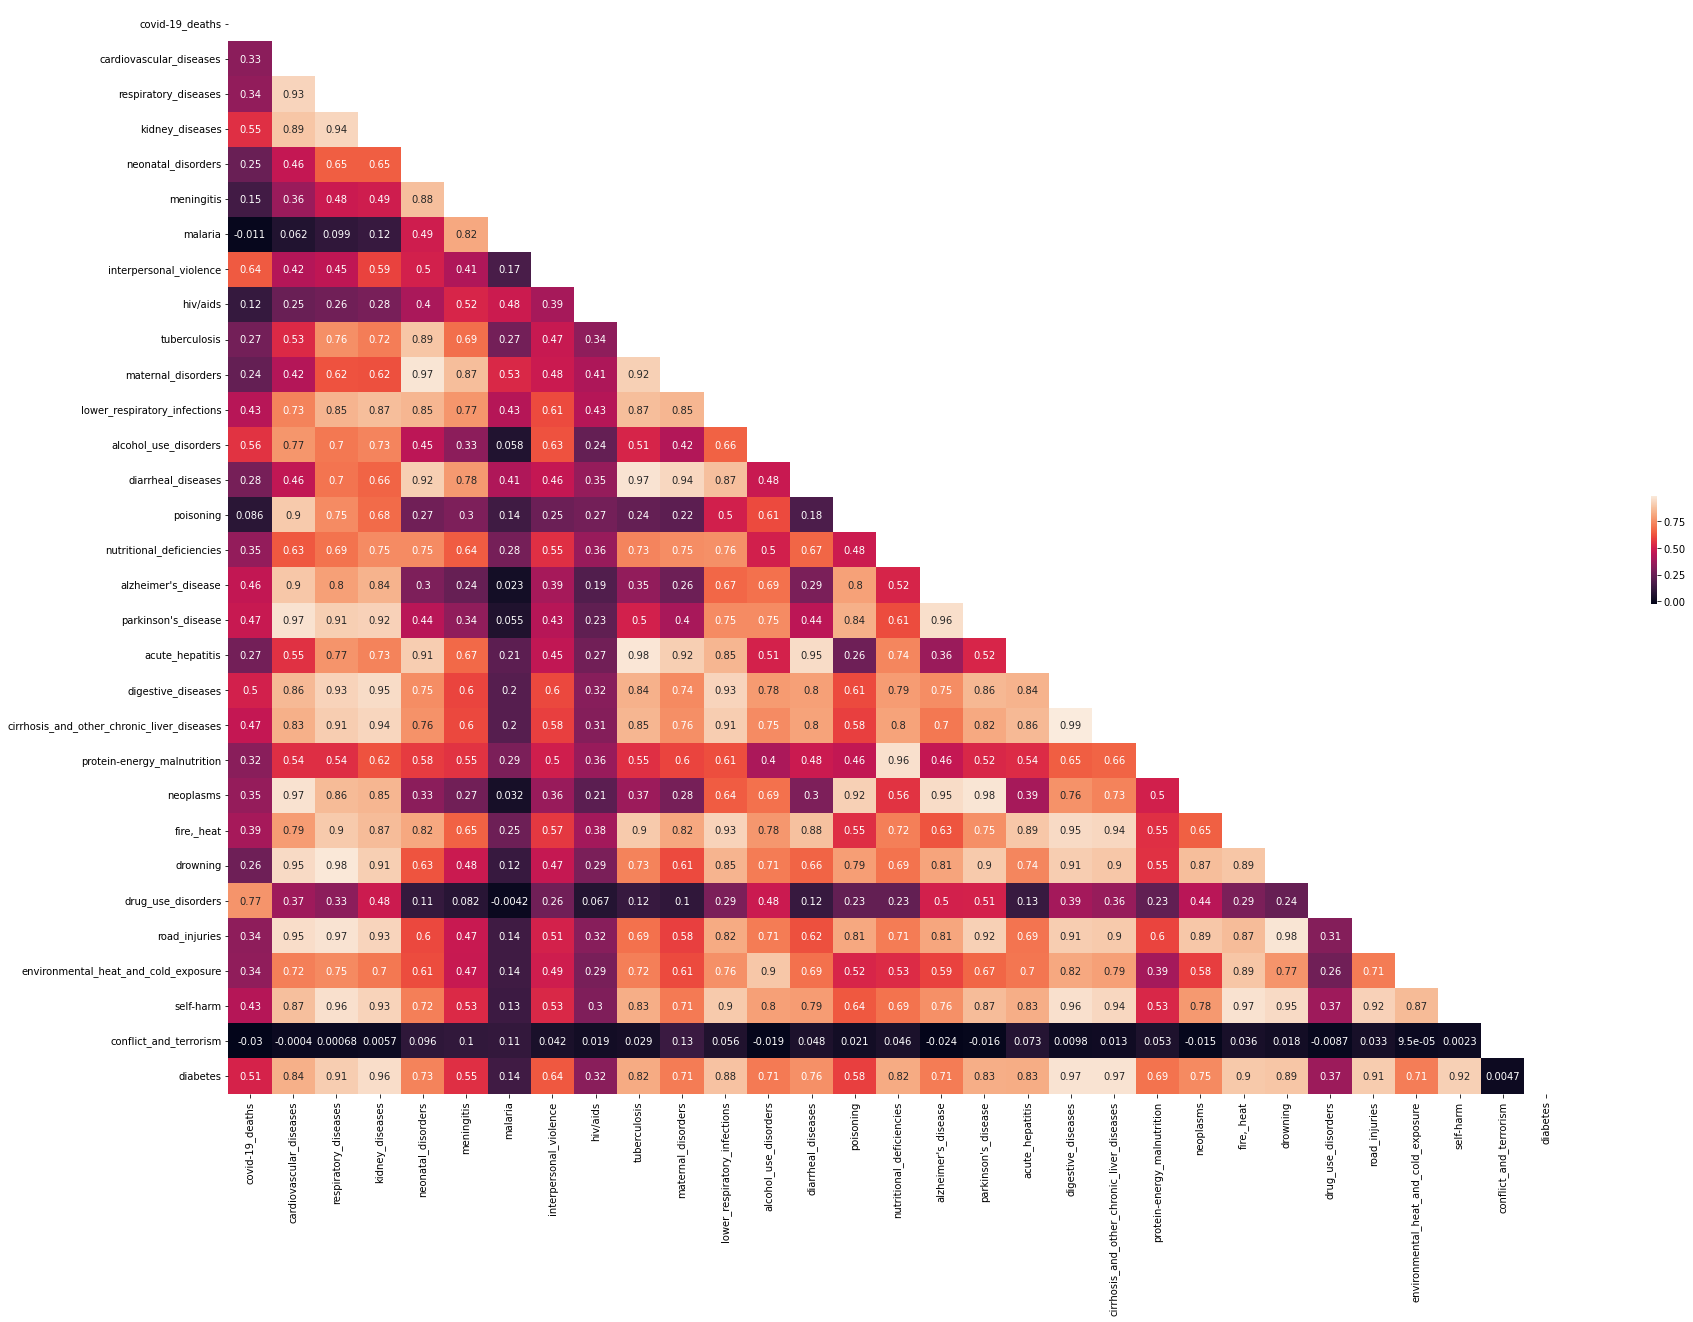

In [17]:
plt.figure(figsize=(30,20))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, annot = True, mask = mask, cbar_kws={"shrink": 0.10});
print("------------Correlation_matrix---------------")

# 2.1 Analysis Spain

In [18]:
spain = df[df['country_name'] == 'Spain']
total_m = int(spain['total_muertes'])
print("Muertes en España en el año 2021:", total_m)

Muertes en España en el año 2021: 462823


In [19]:
spain2 = spain.set_index("country_name").T.sort_values(by='Spain', ascending= False)[1:] #eliminamos 'total_muertes'
spain2['porcentaje'] = spain2['Spain'] / spain2['Spain'].sum() * 100
print("Aunque el Covid19 no figure entre las cinco causas más frecuentes de muerte a nivel global, en España es la tercera causa de muerte más frecuente")
display(spain2)

Aunque el Covid19 no figure entre las cinco causas más frecuentes de muerte a nivel global, en España es la tercera causa de muerte más frecuente


country_name,Spain,porcentaje
cardiovascular_diseases,131493.00,28.41
neoplasms,125835.00,27.19
covid-19_deaths,50837.00,10.98
respiratory_diseases,36560.00,7.90
alzheimer's_disease,29208.00,6.31
digestive_diseases,23212.00,5.02
kidney_diseases,14645.00,3.16
lower_respiratory_infections,14184.00,3.06
diabetes,10135.00,2.19
cirrhosis_and_other_chronic_liver_diseases,8218.00,1.78


In [20]:
table_covid = df[['country_name','covid-19_deaths']].sort_values(by= 'covid-19_deaths', ascending= False)
filter_spain = table_covid[table_covid['covid-19_deaths'] >= 50837.00]
print("España es el duodecimo pais con más muertes por Covid19")
display(filter_spain)

España es el duodecimo pais con más muertes por Covid19


,country_name,covid-19_deaths
182,United States,353948.00
24,Brazil,195541.00
75,India,149218.00
104,Mexico,126507.00
133,Peru,93231.00
81,Italy,74621.00
54,England,74185.00
181,United Kingdom,74185.00
59,France,64777.00
140,Russia,56798.00


In [21]:
table_cardiovascular_diseases = df[['country_name','cardiovascular_diseases']].sort_values(by= 'cardiovascular_diseases', ascending= False)
filter_cardio = table_cardiovascular_diseases[table_cardiovascular_diseases['cardiovascular_diseases'] >= 131493]
print(f"No ocurre lo mismo con la causa más frecuente de muerte. España ocupa la posición numero {len(filter_cardio['country_name'])} en numero de muertes por enfermedades cardiovasculares.")
display(filter_cardio)

No ocurre lo mismo con la causa más frecuente de muerte. España ocupa la posición numero 26 en numero de muertes por enfermedades cardiovasculares.


,country_name,cardiovascular_diseases
35,China,4584273
75,India,2574410
140,Russia,1004931
182,United States,957455
76,Indonesia,651481
179,Ukraine,449376
24,Brazil,397993
83,Japan,372483
63,Germany,364285
127,Pakistan,341108


**Conclusiones:**

- Como es logico, más numero de muertes en los paises más poblados.
- Causas principales de muerte: Tumores y enfermedades cardiovasculares
- La causa más frecuente de muerte, como son las enfermades cardiovasculares, tienen una gran correlación con otras causas de muertes que habría que analizar más profundamente.
- Pese a que el Covid19 no figura entre las causas más frecuentes de muerte, en España es la tercera causa más frecuente